Python Data Analysis Lab 2 : Data Wrangling

In [64]:
#Import Pandas as pd and Matplotlib as plt and numpy as np

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [65]:
#Read the dataset from URL
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [66]:
#Add headers to the dataset
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [67]:
#Use the Pandas method read_csv() to load the data from the web address. 
#Set the parameter "names" equal to the Python list "headers".
#Use the method head() to display the first five rows of the dataframe.

car_ds=pd.read_csv(filename, names= headers)
car_ds.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Deal With Missing Data

In [68]:
#Convert "?" to NaN In the car dataset, missing data comes with the question mark "?". 
#We replace "?" with NaN (Not a Number), which is Python's default missing value marker, 
#for reasons of computational speed and convenience. Here we use the function:
#.replace(A, B, inplace = True) to replace A by B

car_ds.replace("?",np.NaN, inplace=True)
car_ds.head(5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [69]:
#Evaluating for Missing Data The missing values are converted to default. 
#We use the following functions to identify these missing values. 
#There are two methods to detect missing data:
#.isnull() .notnull() The output is a boolean value indicating whether the 
#value that is passed into the argument is in fact missing data.

dsnull = car_ds.isnull()
dsnull.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
#Count missing values in each column Using a for loop in Python, 
#we can quickly figure out the number of missing values in each column. 
#As mentioned above, "True" represents a missing value, "False" means the 
#value is present in the dataset. In the body of the for 
#loop the method ".value_counts()" counts the number of "True" values.

for column in dsnull.columns.values.tolist():
    print(column)
    print(dsnull[column].value_counts())
    print(" ")

symboling
False    205
Name: symboling, dtype: int64
 
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
 
make
False    205
Name: make, dtype: int64
 
fuel-type
False    205
Name: fuel-type, dtype: int64
 
aspiration
False    205
Name: aspiration, dtype: int64
 
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    205
Name: body-style, dtype: int64
 
drive-wheels
False    205
Name: drive-wheels, dtype: int64
 
engine-location
False    205
Name: engine-location, dtype: int64
 
wheel-base
False    205
Name: wheel-base, dtype: int64
 
length
False    205
Name: length, dtype: int64
 
width
False    205
Name: width, dtype: int64
 
height
False    205
Name: height, dtype: int64
 
curb-weight
False    205
Name: curb-weight, dtype: int64
 
engine-type
False    205
Name: engine-type, dtype: int64
 
num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64
 
engine-size
False    205
Name: engine-size, dtype: int64

In [71]:
#Calculate the average of the column: normalized losses
avg_normloss = car_ds["normalized-losses"].astype(float).mean(axis=0)
print("Average of normalized losses:", avg_normloss)


Average of normalized losses: 122.0


In [72]:
#Replace "NaN" by mean value in "normalized-losses" column
car_ds["normalized-losses"].replace(np.NaN,avg_normloss,inplace=True)

In [73]:
#Calculate the mean value for 'bore' column
bore_mean = car_ds["bore"].astype("float").mean(axis=0)
print("Mean of Bore:",bore_mean)

Mean of Bore: 3.3297512437810957


In [74]:
#Replace NaN by mean value
car_ds["bore"].replace(np.nan,bore_mean,inplace=True)

In [75]:
#Question #1: According to the example above, replace NaN in "stroke" column by mean.
stroke_mean = car_ds["stroke"].astype("float").mean(axis=0)
car_ds["stroke"].replace(np.nan,stroke_mean,inplace=True)

In [76]:
#Calculate the mean value for the 'horsepower' column:Replace "NaN" by mean value
horsepower_mean=car_ds["horsepower"].astype("float").mean(axis=0)
car_ds["horsepower"].replace(np.nan,horsepower_mean,inplace=True)

In [77]:
#Calculate the mean value for 'peak-rpm' column: Replace NaN by mean value
peak_rpm_mean=car_ds["peak-rpm"].astype("float").mean(axis=0)
car_ds["peak-rpm"].replace(np.nan,peak_rpm_mean,inplace=True)

In [78]:
#To see which values are present in a particular column, we can use the ".value_counts()" method:
car_ds["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [79]:
#We can also use the ".idxmax()" method to calculate for us the most common type automatically:
car_ds["num-of-doors"].value_counts().idxmax()

'four'

In [80]:
#replace the missing 'num-of-doors' values by the most frequent 
car_ds["num-of-doors"].replace(np.nan,"four",inplace=True)

In [81]:
#Finally, let's drop all rows that do not have price data:
car_ds.dropna(subset=["price"],how='any',inplace=True, axis = 0)
car_ds.reset_index(drop=True, inplace=True)
car_ds.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Correct Data Format

In [82]:
car_ds.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [83]:
car_ds[["bore", "stroke"]] = car_ds[["bore", "stroke"]].astype("float")
car_ds[["normalized-losses"]] = car_ds[["normalized-losses"]].astype("int")
car_ds[["price"]] = car_ds[["price"]].astype("float")
car_ds[["peak-rpm"]] = car_ds[["peak-rpm"]].astype("float")

In [84]:
car_ds.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [85]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
car_ds["city-L/100Km"] = 235/car_ds["city-mpg"]
car_ds.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100Km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


Data Standardization

In [86]:
car_ds["highway-L/Km"] = 235/car_ds["highway-mpg"]
car_ds.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100Km,highway-L/Km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


Data Normalization

In [87]:
# replace (original value) by (original value)/(maximum value) for height,weight,length
car_ds["length"]=car_ds["length"]/car_ds["length"].max()
car_ds["height"]=car_ds["height"]/car_ds["height"].max()
car_ds["width"]=car_ds["width"]/car_ds["width"].max()

Binning

In [88]:
car_ds["horsepower"]=car_ds["horsepower"].astype("int", copy=True)
car_ds["horsepower"].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

Text(0.5, 1.0, 'Horsepower Bins')

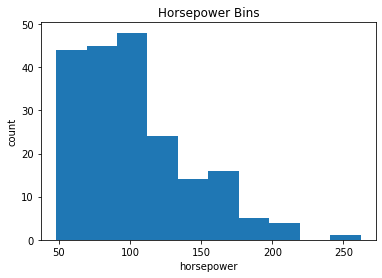

In [89]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(car_ds["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower Bins")

In [90]:
bins = np.linspace(car_ds["horsepower"].min(),car_ds["horsepower"].max(),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [91]:
group_names = ["low","medium","high"]

In [92]:
car_ds["horsepower-binned"] = pd.cut(car_ds["horsepower"], bins, labels=group_names, include_lowest=True)
car_ds[["horsepower", "horsepower-binned"]].head(5)

,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low


In [93]:
car_ds["horsepower-binned"].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Horsepower Bins')

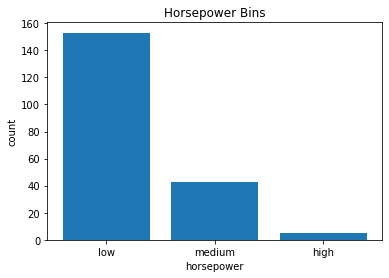

In [94]:
plt.pyplot.bar(group_names,car_ds["horsepower-binned"].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower Bins")

Text(0.5, 1.0, 'Horsepower Bins')

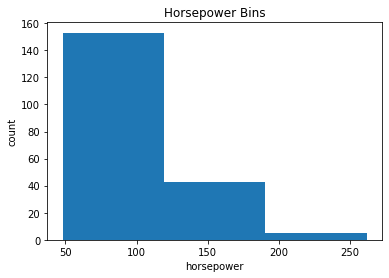

In [95]:
plt.pyplot.hist(car_ds["horsepower"], bins = 3)
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower Bins")

Indicator Variable

In [96]:
car_ds.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100Km', 'highway-L/Km',
       'horsepower-binned'],
      dtype='object')

In [97]:
dummy_var1 = pd.get_dummies(car_ds["fuel-type"])
dummy_var1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [98]:
dummy_var1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)
dummy_var1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [99]:
# merge data frame "df" and "dummy_variable_1" 
car_ds = pd.concat([car_ds,dummy_var1],axis=1)

# drop original column "fuel-type" from "df"
car_ds.drop("fuel-type",axis=1,inplace=True)

In [63]:
car_ds.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100Km,highway-L/Km,horsepower-binned,fuel-type-diesel,fuel-type-gas,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,low,0,1,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,low,0,1,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,medium,0,1,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,low,0,1,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,low,0,1,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,19,25,15250.0,12.368421,9.400000,low,0,1,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,19,25,17710.0,12.368421,9.400000,low,0,1,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,19,25,18920.0,12.368421,9.400000,low,0,1,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,17,20,23875.0,13.823529,11.750000,medium,0,1,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,23,29,16430.0,10.217391,8.103448,low,0,1,0,1


In [102]:
car_ds.to_csv('car_ds.csv')